In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Numerical Value Analysis

<Axes: >

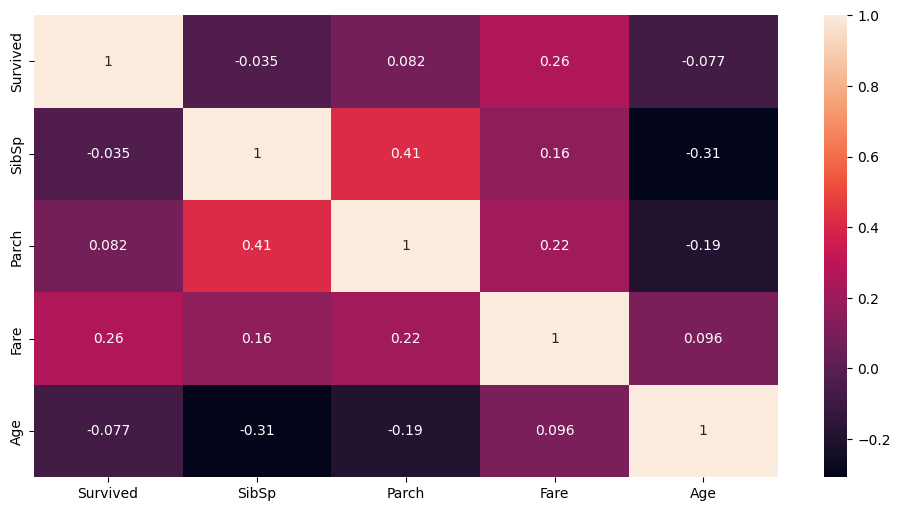

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)

SibSp - no of siblings or spouses aboard the titanic

In [6]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


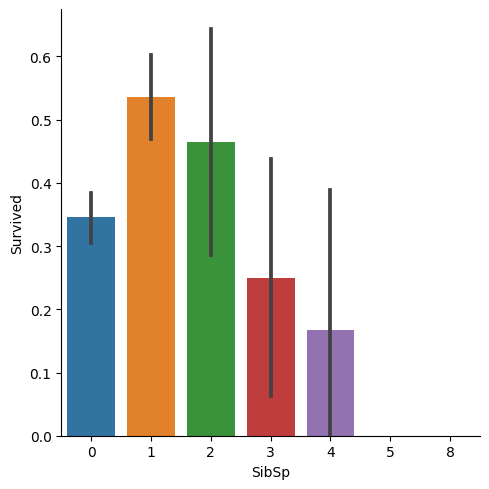

In [7]:
sns.catplot(x="SibSp",y="Survived",data=df,kind="bar")

Age

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packa

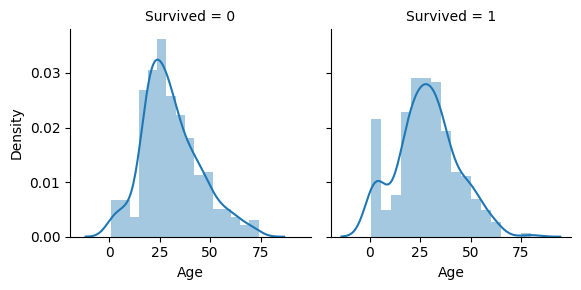

In [8]:
age_visual=sns.FacetGrid(df,col="Survived")
age_visual=age_visual.map(sns.distplot,"Age")

Sex

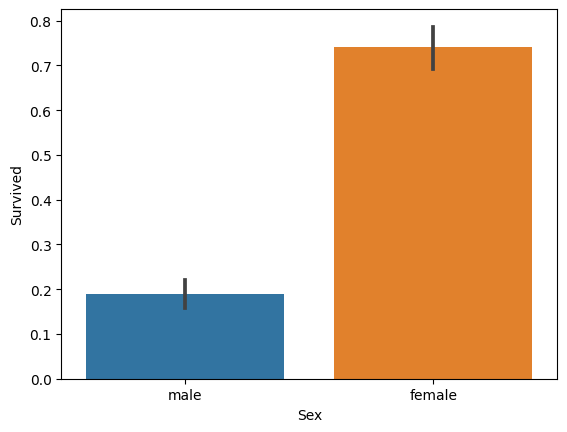

In [9]:
age_plot=sns.barplot(x="Sex",y="Survived",data=df)

In [10]:
df[['Sex','Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


Pclass

<Axes: xlabel='Pclass', ylabel='Survived'>

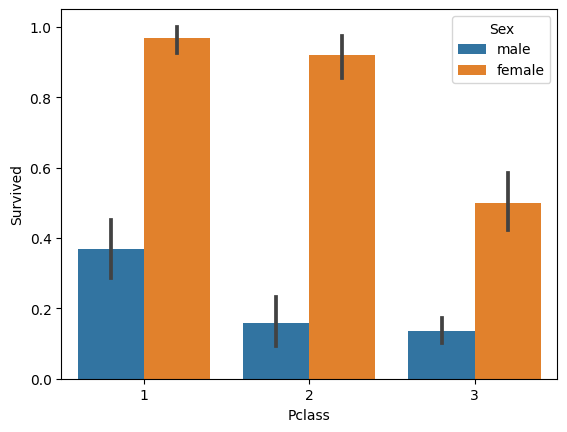

In [11]:
sns.barplot(x="Pclass",y="Survived",data=df,hue="Sex")

Embarked

In [12]:
df['Embarked'].isna().sum()

2

In [13]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
df['Embarked'].fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<Axes: xlabel='Embarked', ylabel='Survived'>

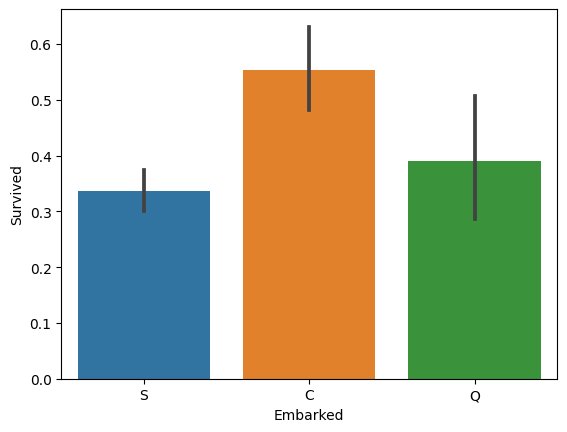

In [15]:
sns.barplot(x="Embarked",y="Survived",data=df)

Preparing data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
mean=df['Age'].mean()
std=df['Age'].std()

isnull=df['Age'].isnull().sum()

In [18]:
print(mean,std,isnull)

29.69911764705882 14.526497332334042 177


In [19]:
rand_age=np.random.randint(mean-std,mean+std,isnull)
rand_age

array([16, 19, 34, 28, 15, 20, 35, 42, 19, 25, 19, 37, 15, 18, 25, 23, 34,
       42, 41, 32, 33, 15, 20, 32, 41, 18, 42, 27, 30, 19, 26, 37, 24, 31,
       39, 26, 15, 23, 39, 36, 18, 23, 43, 20, 23, 19, 32, 31, 27, 43, 35,
       24, 15, 26, 39, 40, 42, 25, 34, 32, 17, 40, 25, 26, 15, 40, 35, 43,
       37, 26, 38, 37, 29, 27, 34, 33, 37, 41, 21, 37, 17, 20, 23, 25, 28,
       36, 39, 34, 18, 27, 32, 23, 39, 19, 21, 43, 20, 25, 34, 18, 21, 15,
       18, 25, 42, 32, 23, 43, 43, 25, 39, 19, 26, 22, 21, 19, 23, 33, 43,
       33, 24, 30, 35, 17, 39, 41, 40, 19, 39, 23, 16, 43, 25, 40, 18, 40,
       39, 25, 37, 20, 19, 39, 18, 33, 17, 42, 42, 26, 26, 24, 35, 20, 34,
       20, 28, 34, 39, 21, 33, 18, 21, 27, 26, 29, 33, 24, 15, 37, 22, 21,
       31, 41, 32, 43, 29, 20, 17])

In [20]:
a=df['Age'].copy()

In [21]:
a[np.isnan(a)]=rand_age
df['Age']=a


In [22]:
df['Age'].isna().sum()

0

In [23]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket'],inplace=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
gender={"male":0,"female":1}
df['Sex']=df['Sex'].map(gender)

In [26]:
ports={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].fillna("S")
df['Embarked']=df['Embarked'].map(ports)


Splitting the data

In [27]:
x=df.drop(df.columns[[0]],axis=1)
y=df['Survived']

In [28]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
sc_x=StandardScaler()
x_train=sc_x.fit_transform(X_train)
x_test=sc_x.transform(X_test)

In [30]:
logreg=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier(n_estimators=1000)

In [31]:
logreg.fit(x_train,y_train)
svc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [32]:
logreg_predict=logreg.predict(x_test)
svc_predict=svc.predict(x_test)
dtc_predict=dtc.predict(x_test)
knn_predict=knn.predict(x_test)
rf_predict=rf.predict(x_test)


In [33]:
from sklearn.metrics import accuracy_score

logreg_acc=accuracy_score(y_test,logreg_predict)
svc_acc=accuracy_score(y_test,svc_predict)
dtc_acc=accuracy_score(y_test,dtc_predict)
knn_acc=accuracy_score(y_test,knn_predict)
rf_acc=accuracy_score(y_test,rf_predict)

In [35]:
print("Logistic regresssion: ",round(logreg_acc*100,2))
print("SVM                 : ",round(svc_acc*100,2))
print("Decision Tree       : ",round(dtc_acc*100,2))
print("K Neighbors         : ",round(knn_acc*100,2))
print("Random Forest       : ",round(rf_acc*100,2))

Logistic regresssion:  80.6
SVM                 :  80.97
Decision Tree       :  76.49
K Neighbors         :  82.09
Random Forest       :  82.84
